In [6]:
import torch
import math

mu = torch.tensor([0.])
tau = torch.tensor([0.])

lr = 1e-2
B = 16
iterations = 50  # not epochs, iterations
history1 = torch.zeros((iterations + 1, 2))

for itr in range(iterations):
    sigma = torch.exp(tau)
    X = sigma * torch.normal(0, 1, size=(B, 1)) + mu  # (B,1)
    g_mu = torch.sum( X * torch.sin(X) * ((X-mu)/(sigma**2)) , dim = 0 ) + (mu-1)
    g_tau = torch.exp(tau) * (torch.sum( X * torch.sin(X) * ((X-mu)**2/(sigma**3) - 1/sigma) , dim = 0 ) + (1-1/sigma))

    mu = mu - lr * g_mu
    tau = tau - lr * g_tau

    # save history
    history1[itr + 1, 0] = mu
    history1[itr + 1, 1] = torch.exp(tau)

print(mu, torch.exp(tau))

tensor([0.0766]) tensor([0.2003])


In [7]:
mu = torch.tensor([0.])
tau = torch.tensor([0.])

lr = 1e-2
B = 16
iterations = 50  # not epochs, iterations
history2 = torch.zeros((iterations + 1, 2))

for itr in range(iterations):
    sigma = torch.exp(tau)
    Y = torch.normal(0, 1, size=(B, 1))  # (B,1)

    g_mu = torch.sum( (sigma * Y + mu) * torch.cos(sigma * Y + mu) + (sigma * Y + mu) , dim = 0 ) + (mu-1)
    g_tau = torch.exp(tau) * ( torch.sum( ( (sigma * Y + mu) * torch.cos(sigma * Y + mu) + (sigma * Y + mu))*(Y) , dim = 0 ) + (1-1/sigma))

    mu = mu - lr * g_mu
    tau = tau - lr * g_tau

    # save history
    history2[itr + 1, 0] = mu
    history2[itr + 1, 1] = torch.exp(tau)

#print(history2)
print(mu, torch.exp(tau))



tensor([0.0750]) tensor([0.2205])


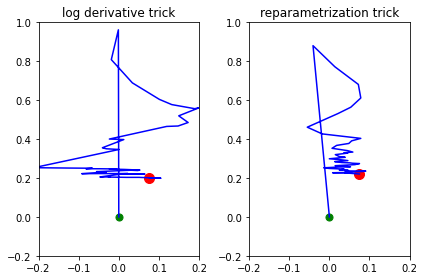

<Figure size 432x288 with 0 Axes>

In [9]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.array(history1[:, 0])
y1 = np.array(history1[:, 1])

x2 = np.array(history2[:, 0])
y2 = np.array(history2[:, 1])

plt.subplot(1, 2, 1)
plt.scatter(0,0, s=50, c='green')
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 1)
plt.plot(x1, y1, linestyle='solid',color='blue')
plt.scatter(history1[-1, 0],history1[-1, 1], s=100, c='red')
plt.title('log derivative trick')

plt.subplot(1, 2, 2)
plt.scatter(0,0, s=50, c='green')
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 1)
plt.plot(x2, y2, linestyle='solid',color='blue')
plt.scatter(history2[-1, 0],history2[-1, 1], s=100, c='red')
plt.title('reparametrization trick')

plt.tight_layout()
plt.show()
plt.savefig('derivative_trick.png')
